In [39]:
# Este codigo esta depreciado, para resultados ver histrogramas. 

import numpy as np
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [40]:
def consulta_desde_archivo(sql):
    # Lee el contenido del archivo SQL
    with open(sql, "r") as file:
        sql = file.read()

    # Ejecuta la consulta y convierte los resultados a un DataFrame de pandas
    cliente = bigquery.Client()
    df_resultado = cliente.query(sql).to_dataframe()
    print(df_resultado.head(2))
    return df_resultado

def asignar_cuadrantes(df, names, condiciones, etiquetas):
    """
    Segmenta el DataFrame `df` basado en las condiciones proporcionadas
    para un conjunto específico de columnas y asigna la etiqueta especificada.

    Parámetros:
    - df: DataFrame de pandas.
    - columnas: Lista de nombres de columnas a considerar.
    - condiciones: Lista de condiciones correspondientes a las columnas en formato de cadena.
    - etiqueta: Etiqueta a asignar cuando se cumplen las condiciones.
    """
    for cond1 in condiciones[names[0]]:
        for cond2 in condiciones[names[1]]:
            mask = (df[names[0]] == cond1) & (df[names[1]] == cond2)
            cuadrante = etiquetas[condiciones[names[0]].index(cond1) * len(condiciones[names[1]]) + condiciones[names[1]].index(cond2)]
            df.loc[mask, 'Cuadrante_Final'] = cuadrante


In [41]:
# Llama a la función con el nombre de tu archivo SQL
df=consulta_desde_archivo("../querys/interacciones_poker.sql") 

                                              td_id1  nInteracciones  \
0               01b4ea21-e740-4398-81b3-32522559b277               1   
1  4341ae295203df8e8366e95692edd9d35808c1b1fa9176...               1   

   Dias_interaccion abi_brand  
0               189     Poker  
1               189     Poker  


In [42]:
df.shape

(478090, 4)

In [43]:
# Crear un nuevo DataFrame con valores menores o iguales a 1
menores1 = df[df['nInteracciones'] <= 1].copy()
# Excluir los valores menores o iguales a 1 del DataFrame original
df = df[df['nInteracciones'] > 1].copy()

In [44]:
menores1.shape

(357912, 4)

In [45]:
df.shape

(120178, 4)

[131.0 154.0]


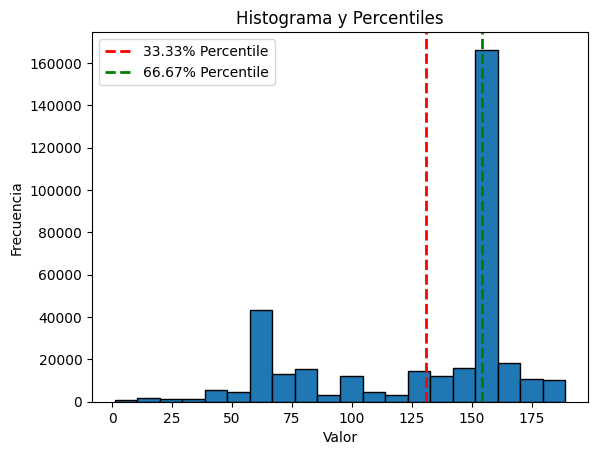

In [46]:
# Calcula el histograma
hist, bins = np.histogram(menores1.Dias_interaccion, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(menores1.Dias_interaccion, [33.33, 66.67])
print(percentiles)

# Crea el histograma
plt.hist(menores1.Dias_interaccion, bins=20, edgecolor='black')
plt.axvline(percentiles[0], color='red', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='green', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma y Percentiles')
plt.legend()

# Muestra el histograma
plt.show()

[131.0 154.0]


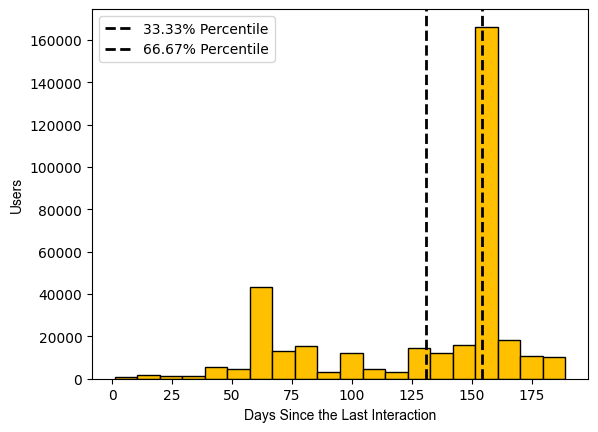

In [47]:
# Calcula el histograma
hist, bins = np.histogram(menores1.Dias_interaccion, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(menores1.Dias_interaccion, [33.33, 66.67])
print(percentiles)

# Crea el histograma
plt.hist(menores1.Dias_interaccion, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Days Since the Last Interaction​', fontname='Arial')
plt.ylabel('Users', fontname='Arial')
# plt.title('Single Interaction Recency Histogram', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

In [48]:
# Segmentar cuadrantes según condiciones (ejemplo)
menores1['Cuadrante'] = ''
menores1.loc[(menores1['Dias_interaccion'] > 190), 'Cuadrante'] = 'Ice'
menores1.loc[(menores1['Dias_interaccion'] >= 87) & (menores1['Dias_interaccion'] <= 190), 'Cuadrante'] = 'Midi'
menores1.loc[(menores1['Dias_interaccion'] < 87), 'Cuadrante'] = 'Early'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias = pd.crosstab(index=menores1['Cuadrante'], columns='count')
print(tabla_frecuencias)

col_0       count
Cuadrante        
Early       87867
Midi       270045


In [49]:
# Segmentar en 9 cuadrantes según condiciones (ejemplo)
menores1['Cuadrante'] = ''
menores1.loc[(menores1['Dias_interaccion'] > 200), 'Cuadrante'] = 'Ice'
menores1.loc[(menores1['Dias_interaccion'] >= 87) & (menores1['Dias_interaccion'] <= 200), 'Cuadrante'] = 'Midi'
menores1.loc[(menores1['Dias_interaccion'] < 87), 'Cuadrante'] = 'Early'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias = pd.crosstab(index=menores1['Cuadrante'], columns='count')
print(tabla_frecuencias)

col_0       count
Cuadrante        
Early       87867
Midi       270045


[77.0 130.0]


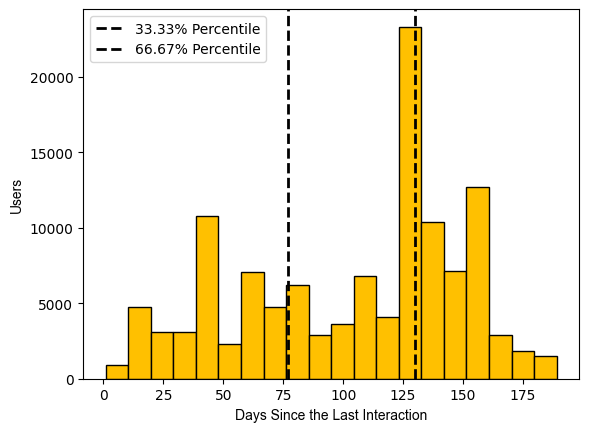

In [50]:
# Calcula el histograma
hist, bins = np.histogram(df.Dias_interaccion, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df.Dias_interaccion, [33.33, 66.67])
print(percentiles)
# Crea el histograma
plt.hist(df.Dias_interaccion, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Days Since the Last Interaction', fontname='Arial')
plt.ylabel('Users', fontname='Arial')
# plt.title('Histograma Usuarios Con Más de Una Interacción', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

[2.0 4.0]


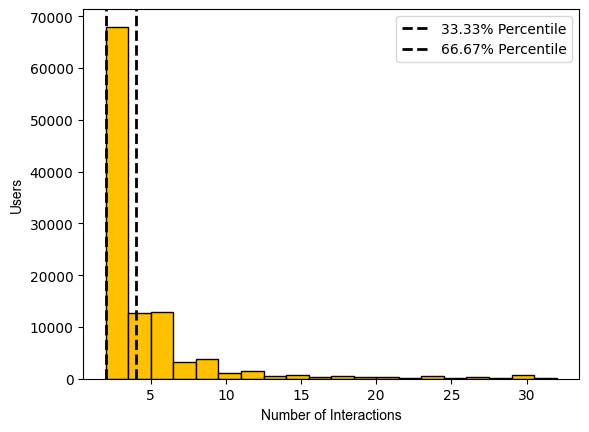

In [51]:
# Calcula el histograma
# Calcula el percentil 99
percentil_90 = np.percentile(df.nInteracciones, 90)

# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = df[df.nInteracciones <= percentil_90]

hist, bins = np.histogram(df_subset.nInteracciones, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df_subset.nInteracciones, [33.33, 66.67])
print(percentiles)
# Crea el histograma
plt.hist(df_subset.nInteracciones, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Number of Interactions', fontname='Arial')
plt.ylabel('Users', fontname='Arial')
# plt.title('Histograma Usuarios Con Más de Una Interacción', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

In [52]:
# Segmentar en 9 cuadrantes según condiciones (ejemplo)
df['CuadranteDias'] = ''
df.loc[(df['Dias_interaccion'] > 130), 'CuadranteDias'] = 'Ice'
df.loc[(df['Dias_interaccion'] >= 77) & (df['Dias_interaccion'] <= 130), 'CuadranteDias'] = 'Midi'
df.loc[(df['Dias_interaccion'] < 77), 'CuadranteDias'] = 'Early'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias_1 = pd.crosstab(index=df['CuadranteDias'], columns='count')
print(tabla_frecuencias_1)

col_0          count
CuadranteDias       
Early          36709
Ice            38797
Midi           44672


In [53]:
df['CuadranteInteracciones'] = ''
df.loc[(df['nInteracciones'] > 4), 'CuadranteInteracciones'] = 'High'
df.loc[(df['nInteracciones'] >=3) & (df['nInteracciones'] <= 4), 'CuadranteInteracciones'] = 'Mid'
df.loc[(df['nInteracciones'] < 3), 'CuadranteInteracciones'] = 'Low'
# Crear una tabla de frecuencias cruzadas
tabla_frecuencias_2 = pd.crosstab(index=df['CuadranteInteracciones'], columns='count')
print(tabla_frecuencias_2)

col_0                   count
CuadranteInteracciones       
High                    39533
Low                     46458
Mid                     34187


In [54]:
df.head()

,td_id1,nInteracciones,Dias_interaccion,abi_brand,CuadranteDias,CuadranteInteracciones
6,8f9921a72c132d3fc068f2f0fae4a5dccb9ce0889bfec1...,2,189,Poker,Ice,Low
12,d12f21fd7912946fea40aebc4290ca7fe8a23384d9a95a...,13,189,Poker,Ice,High
19,c9e36019-e5cf-4853-9f60-973df66f7bb6,2,189,Poker,Ice,Low
28,90222975-b90c-44d6-8931-b793d94c2abe,2,189,Poker,Ice,Low
30,f53ee4f30d6ba2de6bbca651439aa43587f5f5de863099...,2,189,Poker,Ice,Low


In [55]:
def asignar_cuadrantes(df, names, condiciones, etiquetas):
    for cond1 in condiciones[names[0]]:
        for cond2 in condiciones[names[1]]:
            mask = (df[names[0]] == cond1) & (df[names[1]] == cond2)
            cuadrante = etiquetas[condiciones[names[0]].index(cond1) * len(condiciones[names[1]]) + condiciones[names[1]].index(cond2)]
            df.loc[mask, 'Cuadrante_Final'] = cuadrante

In [56]:
# cuadrante final 
names = ['CuadranteDias', 'CuadranteInteracciones']
condiciones_Dias = ['Early', 'Midi,', 'Ice']
condiciones_Interaccione = ['Low', 'Mid', 'High']
etiquetas=['1,1', '1,2', '1,3', '2,1', '2,2', '2,3', '3,1', '3,2', '3,3']
df.loc[(df[names[0]] == condiciones_Dias[0]) & (df[names[1]] == condiciones_Interaccione[0]), 'Cuadrante_Final'] = etiquetas[0]

# segmentar_y_etiquetar(df, names, ['==Ice', '==Low'], 'Ice-Low')


In [57]:
names = ['CuadranteDias', 'CuadranteInteracciones']
condiciones = {
    'CuadranteDias': ['Early', 'Midi', 'Ice'],
    'CuadranteInteracciones': ['Low', 'Mid', 'High']
}
etiquetas = ['1,1', '1,2', '1,3', '2,1', '2,2', '2,3', '3,1', '3,2', '3,3']

asignar_cuadrantes(df, names, condiciones, etiquetas)

In [58]:
df.Cuadrante_Final.value_counts()

Cuadrante_Final
3,1    18637
2,3    15952
2,1    14654
2,2    14066
1,1    13167
1,3    12561
3,3    11020
1,2    10981
3,2     9140
Name: count, dtype: int64

In [61]:
df[df.Cuadrante_Final=='2,1']


,td_id1,nInteracciones,Dias_interaccion,abi_brand,CuadranteDias,CuadranteInteracciones,Cuadrante_Final
277608,d1fd1bbdefe62e86342dd93b73fdc4b024c599805eeb69...,2,130,Poker,Midi,Low,"2,1"
277613,f758a5af474550452bdd074844ec942ebfdaab9d81fcd5...,2,130,Poker,Midi,Low,"2,1"
277616,39dbd1e38cd84bb9ff62079f41de494ca51411213bee8b...,2,130,Poker,Midi,Low,"2,1"
277622,3d935f5ac6422efed866a2e35350396e27ebb574273bb6...,2,130,Poker,Midi,Low,"2,1"
277623,6766bd93691c0db77a4cfb96aa5433beab230fe26b4f11...,2,130,Poker,Midi,Low,"2,1"
...,...,...,...,...,...,...,...
369387,37741d0f-582c-4a49-9ac3-1b85d0a4377f,2,77,Poker,Midi,Low,"2,1"
369389,12f56c4c-6eb3-4884-a683-66569a5b5131,2,77,Poker,Midi,Low,"2,1"
369390,94995358-a320-46f8-8382-c7850f4fce05,2,77,Poker,Midi,Low,"2,1"
369396,dddfb5a621e81e694e1423e6b23c8e0733bc2773763ed7...,2,77,Poker,Midi,Low,"2,1"


In [ ]:
# Guardar el DataFrame como un archivo CSV
df.to_csv('interacciones.csv', index=False)

In [ ]:
 # Ejecuta la consulta y convierte los resultados a un DataFrame de pandas
sql='''
select
td_id,
Clasificacion
from
`abi-martech-maz-col.tadabra.Master_Tada_acumulado`
where td_id is not null 
'''
cliente = bigquery.Client()
df_resultado = cliente.query(sql).to_dataframe()
print(df_resultado.head(2))

In [ ]:
base = pd.merge(menores1, df_resultado, left_on='td_id1', right_on='td_id', how='left')

In [ ]:
base.head()

In [ ]:
filtro = ['Casual', 'Core', 'Power', 'First Month']
base_rfm=base[base['Clasificacion'].isin (filtro)]

In [ ]:
base_rfm.Clasificacion.value_counts()

In [ ]:
# Filtrar valores sin NaN en 'Columna'
base_rfm_final = base_rfm.dropna(subset=['td_id'])

In [ ]:
df.head()

In [ ]:
base_rfm_final.Clasificacion.value_counts()

In [ ]:
base_rfm_final.shape

In [ ]:
base_rfm_final.loc[(base_rfm_final['Clasificacion'] =='First Month') , 'Clasificacion'] = 'Casual'

In [ ]:
names = ['CuadranteDias', 'CuadranteInteracciones']
condiciones = {
    'CuadranteDias': ['Early', 'Midi', 'Ice'],
    'CuadranteInteracciones': ['Low', 'Mid', 'High']
}
etiquetas = ['1,1', '1,2', '1,3', '2,1', '2,2', '2,3', '3,1', '3,2', '3,3']

asignar_cuadrantes(base_rfm_final, names, condiciones, etiquetas)

In [ ]:
base_rfm_final[base_rfm_final.Cuadrante_Final=='3,1']

In [ ]:
base_rfm_final.Cuadrante_Final.value_counts()